In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv("ZomatoDataset/zomato.csv",encoding="latin1")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [14]:
print(df.columns)
print(df.info())

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             95

In [15]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Steps to EDA
1. Missing Values and Outliers
2. Explore Numerical Variables
3. Explore Categorical Variables
4. Feature Relationships


In [25]:
print(df.isnull().sum())
print([feature for feature in df.columns if df[feature].isnull().sum()>0])
df.dropna(inplace=True)
print([feature for feature in df.columns if df[feature].isnull().sum()>0])

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
['Cuisines']
[]


In [30]:
country_codes=pd.read_excel("ZomatoDataset/Country-Code.xlsx")
country_codes.head(3)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil


In [35]:
df=df.merge(country_codes,on='Country Code')
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country_x', 'Country_y', 'Country'],
      dtype='object')

In [55]:
print(df.Country.value_counts())
country_names=df['Country'].unique()

Country
India             8652
United States      425
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x2b4407a6790>,
 [Text(-1.0754537485723337, 0.2310827442318351, 'India'),
  Text(1.05734911623794, -0.30333619367106107, 'United States'),
  Text(1.0935476044218948, -0.11896905842753965, 'United Kingdom'),
  Text(1.097957059902713, -0.06700966057062333, 'Brazil'),
  Text(1.0997729465240367, -0.02234873808157454, 'UAE')],
 [Text(-0.5866111355849092, 0.1260451332173646, '93.26%'),
  Text(0.5767358815843309, -0.16545610563876056, '4.58%'),
  Text(0.5964805115028516, -0.06489221368774889, '0.86%'),
  Text(0.5988856690378435, -0.03655072394761272, '0.65%'),
  Text(0.5998761526494745, -0.012190220771767929, '0.65%')])

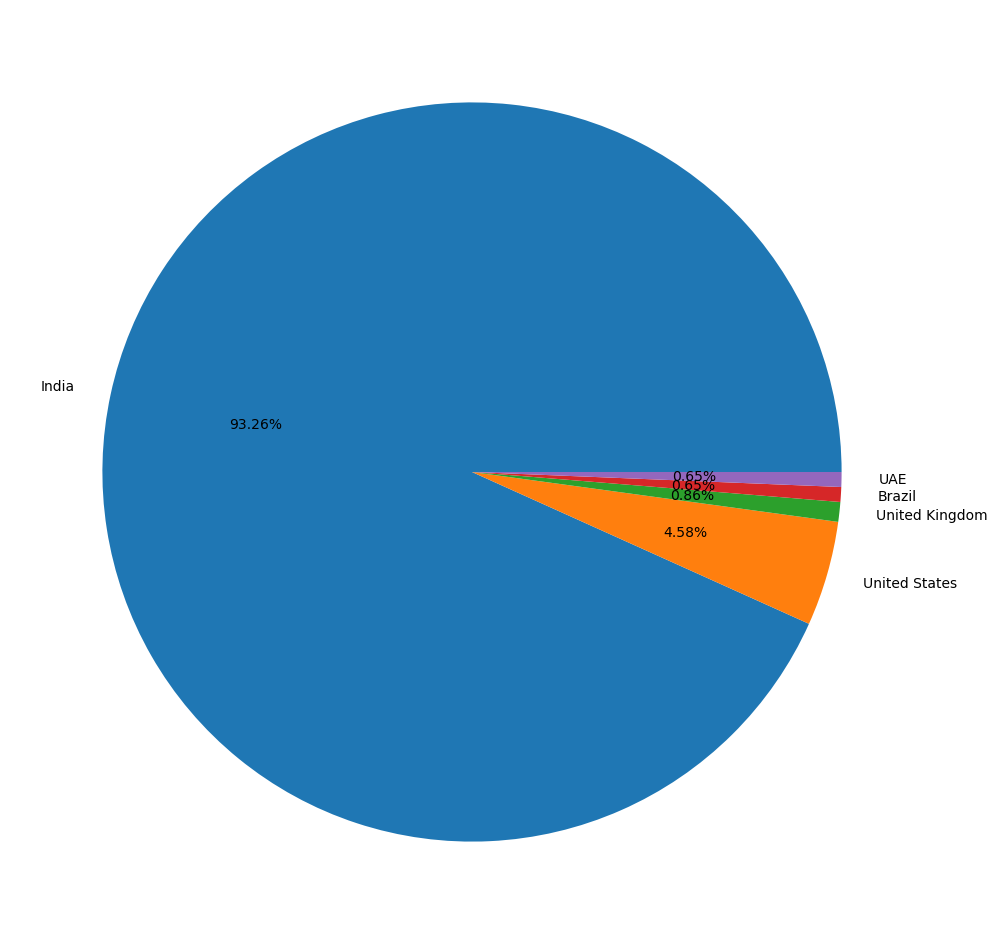

In [89]:
#PieChart, only for Top 5 (Since its messy)
plt.rcParams['figure.figsize']=12,12
plt.pie(labels=df.Country.value_counts().index[:5], x= df.Country.value_counts().values[:5], autopct='%1.2f%%')

In [ ]:
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [81]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observations
1. Excellent-> 4.5-4.9
2. Very Good -> 4.0-4.4
3. Good -> 3.5-3.9
4. Average -> 2.5-3.4
5. Poor -> 1.8-2.4
6. Not rated 0.0 

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

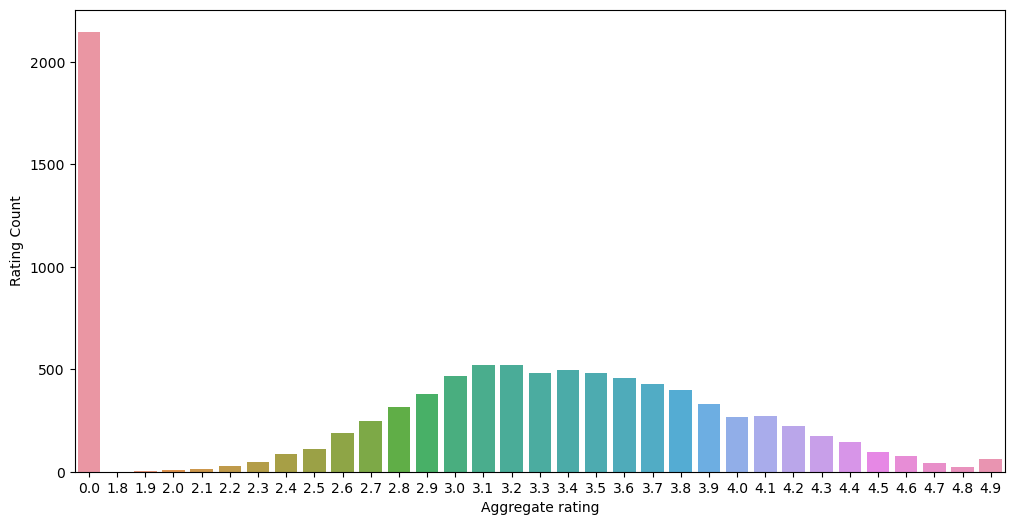

In [94]:
plt.rcParams['figure.figsize']=12,6
sns.barplot(x=ratings['Aggregate rating'],y=ratings['Rating Count'])
#sns.barplot(hue=ratings['Rating color'],x=ratings['Aggregate rating'],y=ratings['Rating Count'])


In [111]:
#Find the country names with 0 ratings
#df[df['Aggregate rating']==0.0]['Country'].unique()
df[df['Aggregate rating']==0.0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [135]:
#Find which currency is used by which country
df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [154]:
#Which Countries have online deliveries?
print(df[df['Has Online delivery']=='Yes']['Country'].value_counts())

df[['Country','Has Online delivery']].groupby(['Country','Has Online delivery']).size().reset_index()

Country
India    2423
UAE        28
Name: count, dtype: int64


,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


([<matplotlib.patches.Wedge at 0x2b44b1ceb10>,
 [Text(-0.5885541119444019, 0.9293029954290133, 'New Delhi'),
  Text(-0.006008322137253758, -1.099983590816288, 'Gurgaon'),
  Text(0.8279428936915272, -0.7242310161721195, 'Noida'),
  Text(1.0782100088727444, -0.21786045250718752, 'Faridabad'),
  Text(1.0953795414972105, -0.10071573893568578, 'Ghaziabad'),
  Text(1.097010627021975, -0.08104124999562284, 'Ahmedabad'),
  Text(1.0981912920377443, -0.06305462784340321, 'Amritsar'),
  Text(1.0990770676906627, -0.04505107408813379, 'Guwahati'),
  Text(1.0996677161298025, -0.027035423093857848, 'Bhubaneshwar'),
  Text(1.0999630787526116, -0.00901251247300567, 'Lucknow')])

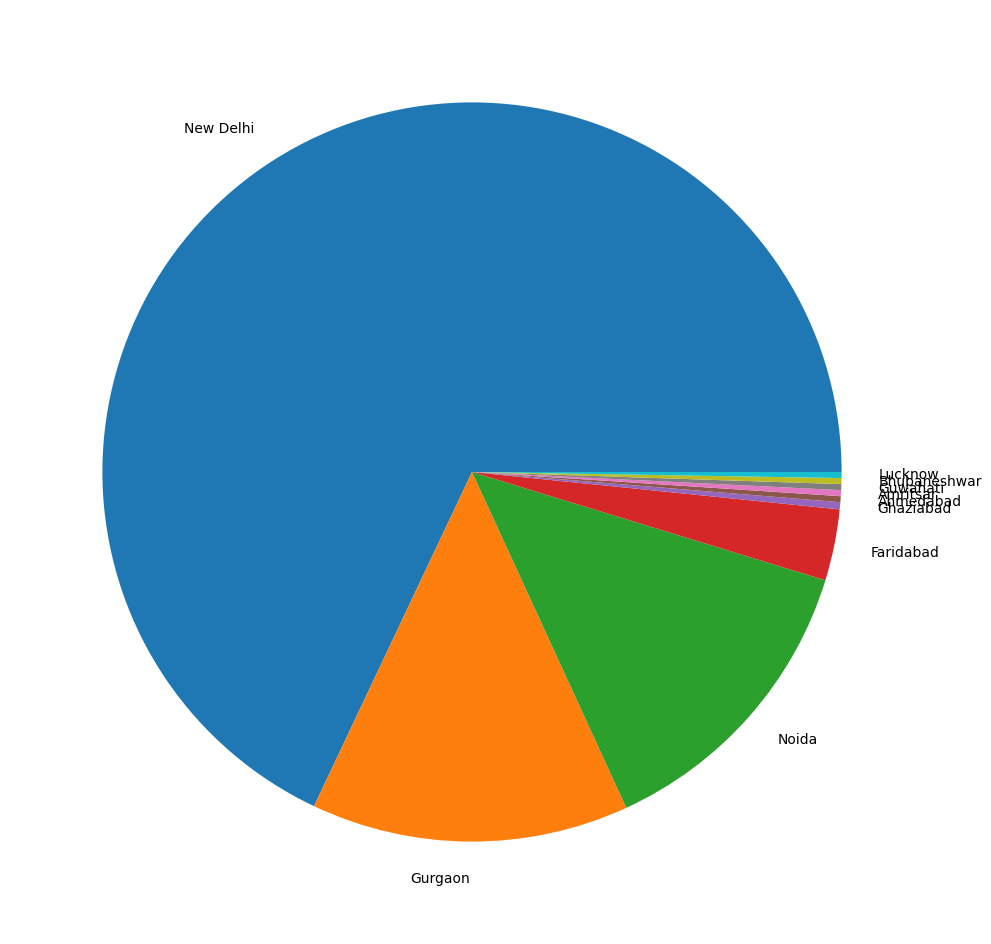

In [178]:
#Create a  Pie Chart for Cities Distribution
#df['City'].value_counts().index
#df['City'].value_counts().values
plt.rcParams['figure.figsize']=(12,12)
plt.pie(labels=df['City'].value_counts().index[:10],x=df['City'].value_counts().values[:10])

In [185]:
#Find the top 10 cuisines
df['Cuisines'].value_counts()[:10]
df[['Cuisines','Aggregate rating']].groupby(['Cuisines','Aggregate rating']).size().reset_index()

,Cuisines,Aggregate rating,0
0,Afghani,0.0,3
1,Afghani,2.9,1
2,"Afghani, Mughlai, Chinese",0.0,1
3,"Afghani, North Indian",0.0,1
4,"Afghani, North Indian, Pakistani, Arabian",0.0,1
...,...,...,...
3919,"Western, Asian, Cafe",4.2,1
3920,"Western, Fusion, Fast Food",3.2,1
3921,World Cuisine,4.9,1
3922,"World Cuisine, Mexican, Italian",4.4,1
